<a href="https://colab.research.google.com/github/Thejashwini08/Intel-Unnati/blob/main/Sentiment_analysis_using_Transformers_i7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

*For basic sentiment analysis, to categorize the data based on POSITIVE and NEGATIVE scale, we have used a pretrained model called Hugging face Transformers.*

In [ ]:
#install transformers
!pip install transformers

Importing pipeline which is available in transformers library to perform sentiment analysis.

In [ ]:
from transformers import pipeline
# create pipeline for sentiment analysis
classification = pipeline('sentiment-analysis')

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that aut

config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

Creating a separate column and Classifying each row based on the sentiments as postive and negative.

In [1]:
import pandas as pd
df = pd.read_csv('/content/cleaned_reviews_i7.csv')
df['classification'] = df['cleaned_review'].apply(lambda x: classification(x)[0]['label'])

#to save the result in a new csv file
df.to_csv('cleaned_reviews_i7_results.csv', index=False)

FileNotFoundError: [Errno 2] No such file or directory: '/content/cleaned_reviews_i7.csv'

*Importing the necessary libraries*

In [ ]:
from transformers import pipeline
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score, f1_score, confusion_matrix
from sklearn.model_selection import train_test_split

In [ ]:
df = pd.read_csv("/content/cleaned_reviews_i7_results.csv")
# setting the columns
df.columns = ['filterBY Rating','ratingScore','reviewDescription','reviewTitle','language','corrected_review','cleaned_review', 'classification']
df = df.dropna()

df.head()

,filterBY Rating,ratingScore,reviewDescription,reviewTitle,language,corrected_review,cleaned_review,classification
0,threeStar,3,I had tons of issues with this cpu. I returned...,Issues...,en,I had tons of issues with this CPU. I returned...,I had tons of issues with this CPU. I returned...,NEGATIVE
1,twoStar,2,"Ive bought AMD for a long time, this is my fir...",No thermal paste?,en,"Ve bought AMD for a long time, this is my firs...","Ve bought AMD for a long time, this is my firs...",NEGATIVE
2,fourStar,4,"This processor is a speed demon. Gaming, editi...",Insane performance at a cost,en,"His processor is a speed demon. Naming, editin...","His processor is a speed demon. Naming, editin...",NEGATIVE
3,fourStar,4,I upgraded from an 8700k to this 14700k nearly...,Main improvement is lower power cost day-day,en,I upgrade from an 8700k to this 14700k nearly ...,I upgrade from an 8700k to this 14700k nearly ...,NEGATIVE
4,fourStar,4,I'm using this as a server CPU mostly for the ...,Works but not the most stable,en,I'm using this as a server CPU mostly for the ...,I'm using this as a server CPU mostly for the ...,NEGATIVE


Accessing only the required columns to display

In [ ]:
df = df[['cleaned_review', 'classification']]

In [ ]:
df['classification'] = df['classification'].map({'POSITIVE': 1, 'NEGATIVE': 0})

# *Now we have the balanced distribution of the classes*

<Axes: >

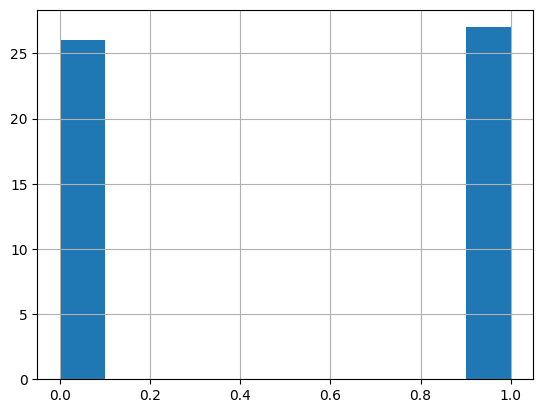

In [ ]:
df['classification'].hist()

Let'stry to create a list of keywords

Let's preprocess the whole dataset

In [ ]:
pip install nltk pandas tqdm emot

In [ ]:
#Getting all the necessary libraries imported.
import pandas as pd
from tqdm import tqdm
import re
import unicodedata as uni
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from emot.emo_unicode import UNICODE_EMOJI

import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

# Removing any URL's found in the reviews
def remove_url(text):
    return re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)

#replacing emoji's with text symbols
def handle_emoji(text):
    for emot in UNICODE_EMOJI:
        text = text.replace(emot, UNICODE_EMOJI[emot])
    return text
# Removing all the stopwords
def remove_stopwords(tokens):
    stop_words = set(stopwords.words('english'))
    return [word for word in tokens if word not in stop_words]
#Lemmatizing the reviews
def lemmatization(tokens):
    lemmatizer = WordNetLemmatizer()
    return [lemmatizer.lemmatize(word) for word in tokens]

def preprocessing(text):
    text = remove_url(text)
    text = uni.normalize('NFKD', text)
    text = handle_emoji(text)
    text = text.lower()
    text = re.sub(r'[^\w\s]', '', text)
    text = word_tokenize(text)
    text = lemmatization(text)
    text = remove_stopwords(text)
    text = " ".join(text)

    return text


df = pd.read_csv('/content/cleaned_reviews_i7_results.csv')

tqdm.pandas()


df['cleaned_review'] = df['cleaned_review'].progress_map(preprocessing)

df.to_csv('/content/cleaned_reviews_i7_results.csv', index=False)


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
100%|██████████| 53/53 [00:00<00:00, 974.53it/s]


In [ ]:
import pandas as pd
from tqdm import tqdm

from nltk.tokenize import word_tokenize

import nltk
nltk.download('punkt')

def word_tokenizer(text):
    return word_tokenize(text)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
from tqdm import tqdm

tqdm.pandas()

df['clean_review2'] = df['cleaned_review'].progress_map(word_tokenizer)

100%|██████████| 53/53 [00:00<00:00, 3393.61it/s]


In [ ]:
df.head()

,filterByRating,ratingScore,reviewDescription,reviewTitle,language,corrected_review,cleaned_review,classification,clean_review2
0,threeStar,3,I had tons of issues with this cpu. I returned...,Issues...,en,I had tons of issues with this CPU. I returned...,ton issue cpu returned purchased elsewhere due...,NEGATIVE,"[ton, issue, cpu, returned, purchased, elsewhe..."
1,twoStar,2,"Ive bought AMD for a long time, this is my fir...",No thermal paste?,en,"Ve bought AMD for a long time, this is my firs...",bought amd long time first time trying inter s...,NEGATIVE,"[bought, amd, long, time, first, time, trying,..."
2,fourStar,4,"This processor is a speed demon. Gaming, editi...",Insane performance at a cost,en,"His processor is a speed demon. Naming, editin...",processor speed demon naming editing encoding ...,NEGATIVE,"[processor, speed, demon, naming, editing, enc..."
3,fourStar,4,I upgraded from an 8700k to this 14700k nearly...,Main improvement is lower power cost day-day,en,I upgrade from an 8700k to this 14700k nearly ...,upgrade 8700k 14700k nearly 8 year later perfo...,NEGATIVE,"[upgrade, 8700k, 14700k, nearly, 8, year, late..."
4,fourStar,4,I'm using this as a server CPU mostly for the ...,Works but not the most stable,en,I'm using this as a server CPU mostly for the ...,im using server cpu mostly ofiov capable gpu s...,NEGATIVE,"[im, using, server, cpu, mostly, ofiov, capabl..."


Now all the keyword have been stored in a list. We can use this list of keywords to perform Latent Dirichlit allocation.

In [ ]:
#Saving the output in a new csv file for future use
df.to_csv('processed_reviews.csv', index=False)

# **Latent Dirichlit Allocation (LDA)**

LDA is a techninque used to asign keywords with a probability distribution. For more about LDA i have learnt from https://towardsdatascience.com/end-to-end-topic-modeling-in-python-latent-dirichlet-allocation-lda-35ce4ed6b3e0

In [ ]:
data_words = df['clean_review2'].values.tolist()
len(data_words)

53

In [ ]:
import gensim.corpora as corpora
id2word = corpora.Dictionary(data_words)
texts = data_words
corpus = [id2word.doc2bow(text) for text in texts]
print(corpus[:1][0][:30])

[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 2), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 2), (17, 1), (18, 2), (19, 1), (20, 1), (21, 1), (22, 1), (23, 1), (24, 1), (25, 1), (26, 1), (27, 1), (28, 1), (29, 1)]


In [ ]:
from gensim.models import LdaMulticore
from gensim.models import LdaModel
from pprint import pprint

num_topics = 10

lda_model = LdaMulticore(corpus=corpus, id2word=id2word,
                     num_topics=num_topics, iterations=400)
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


[(0,
  '0.017*"run" + 0.009*"difference" + 0.009*"ddr5" + 0.009*"case" + '
  '0.008*"worst" + 0.008*"cooling" + 0.007*"gpu" + 0.007*"cooper" + '
  '0.007*"generation" + 0.007*"64"'),
 (1,
  '0.020*"gazing" + 0.015*"come" + 0.010*"editing" + 0.010*"high" + '
  '0.010*"computer" + 0.010*"processor" + 0.010*"boost" + 0.010*"gen" + '
  '0.010*"cool" + 0.005*"bought"'),
 (2,
  '0.016*"chip" + 0.013*"overall" + 0.009*"heat" + 0.009*"lot" + '
  '0.008*"notice" + 0.008*"45" + 0.008*"gain" + 0.008*"gotten" + '
  '0.008*"havent" + 0.007*"good"'),
 (3,
  '0.017*"wa" + 0.012*"able" + 0.010*"chip" + 0.009*"go" + 0.009*"processor" + '
  '0.009*"must" + 0.009*"great" + 0.008*"new" + 0.007*"overall" + 0.006*"get"'),
 (4,
  '0.030*"wa" + 0.025*"issue" + 0.025*"cpu" + 0.020*"ram" + '
  '0.015*"motherboard" + 0.010*"test" + 0.010*"fine" + 0.010*"fast" + '
  '0.010*"system" + 0.010*"first"'),
 (5,
  '0.018*"cpu" + 0.011*"super" + 0.011*"put" + 0.008*"run" + 0.008*"13700k" + '
  '0.008*"good" + 0.008*"real

The review data that we have is not a labeled data. So we consider the most mentioned and important features of the Intel core i7 processor.
Let us consdier the following features to classify the data and obtain an insight to the Intel product.



1.   CPU
2.   Speed
3.   Processor
4.   Upgrade
5.   Core
6.   temperature
7.   cost





We are creating a similarity matrix using python genshim

In [ ]:
%%time
from gensim.models import FastText
fasttext_model = FastText(data_words, vector_size= 100, window=5, min_count=5, workers=4,sg=1)
# fasttext_model = FastText.load_fasttext_format("../input/fast100/cc.en.100.bin")

CPU times: user 1e+03 ms, sys: 230 ms, total: 1.23 s
Wall time: 1.23 s


In [ ]:
fasttext_model.save("FastText-Model-For-ABSA.bin")

In [ ]:
aspects = ["cpu", "speed", "processor", "upgrade", "core", "temperature","cost"]

def get_similarity(text, aspect):
    try:
        text = " ".join(text)
        return fasttext_model.wv.n_similarity(text, aspect)
    except:
        return 0

In [ ]:
from tqdm import tqdm
tqdm.pandas()
for aspect in aspects:
    df[aspect] = df['clean_review2'].progress_map(lambda text: get_similarity(text, aspect))

100%|██████████| 53/53 [00:00<00:00, 447.50it/s]


In [ ]:
df.head()

,filterByRating,ratingScore,reviewDescription,reviewTitle,language,corrected_review,cleaned_review,classification,clean_review2,cpu,speed,processor,upgrade,core,temperature,cost
0,threeStar,3,I had tons of issues with this cpu. I returned...,Issues...,en,I had tons of issues with this CPU. I returned...,ton issue cpu returned purchased elsewhere due...,NEGATIVE,"[ton, issue, cpu, returned, purchased, elsewhe...",0.240626,0.465826,0.485580,0.553459,0.479145,0.597393,0.282769
1,twoStar,2,"Ive bought AMD for a long time, this is my fir...",No thermal paste?,en,"Ve bought AMD for a long time, this is my firs...",bought amd long time first time trying inter s...,NEGATIVE,"[bought, amd, long, time, first, time, trying,...",0.148152,0.437060,0.352683,0.522839,0.333863,0.680320,0.276285
2,fourStar,4,"This processor is a speed demon. Gaming, editi...",Insane performance at a cost,en,"His processor is a speed demon. Naming, editin...",processor speed demon naming editing encoding ...,NEGATIVE,"[processor, speed, demon, naming, editing, enc...",0.218604,0.462162,0.429178,0.519270,0.459759,0.556110,0.286037
3,fourStar,4,I upgraded from an 8700k to this 14700k nearly...,Main improvement is lower power cost day-day,en,I upgrade from an 8700k to this 14700k nearly ...,upgrade 8700k 14700k nearly 8 year later perfo...,NEGATIVE,"[upgrade, 8700k, 14700k, nearly, 8, year, late...",0.225412,0.482656,0.436075,0.572372,0.447867,0.617817,0.229286
4,fourStar,4,I'm using this as a server CPU mostly for the ...,Works but not the most stable,en,I'm using this as a server CPU mostly for the ...,im using server cpu mostly ofiov capable gpu s...,NEGATIVE,"[im, using, server, cpu, mostly, ofiov, capabl...",0.294873,0.422591,0.460550,0.505631,0.350966,0.518527,0.351615


In [ ]:
df.to_csv("Clean_Amazon_Intel_i7_Review.csv", index = False)

In [ ]:
!cp /content/* /content/drive/MyDrive/Sentiment\ analysis\ i7/

cp: -r not specified; omitting directory '/content/drive'
cp: -r not specified; omitting directory '/content/sample_data'
